In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [25]:
data = pd.read_csv("Virat_Kohli.csv")
print(data.head())

   Runs  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition         Ground  \
0    12  22   1   0  54.54  2.0       lbw     1  v Sri Lanka       Dambulla   
1    37  67   6   0  55.22  2.0    caught     2  v Sri Lanka       Dambulla   
2    25  38   4   0  65.78  1.0   run out     1  v Sri Lanka  Colombo (RPS)   
3    54  66   7   0  81.81  1.0    bowled     1  v Sri Lanka  Colombo (RPS)   
4    31  46   3   1  67.39  1.0       lbw     2  v Sri Lanka  Colombo (RPS)   

  Start Date  
0  18-Aug-08  
1  20-Aug-08  
2  24-Aug-08  
3  27-Aug-08  
4  29-Aug-08  


In [26]:
print(data.isnull().sum())

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


In [27]:
# Total Runs Between 18-Aug-08 - 22-Jan-17
data["Runs"].sum()

6184

In [28]:
# Average Runs Between 18-Aug-08 - 22-Jan-17
data["Runs"].mean()

46.84848484848485

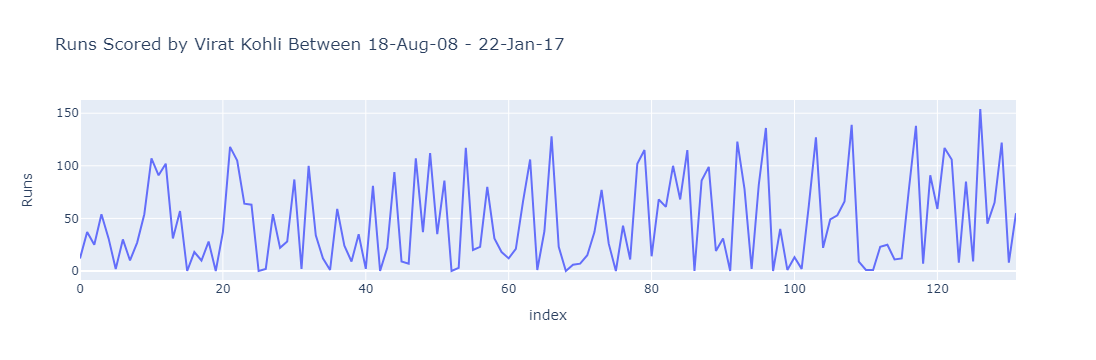

In [29]:
matches = data.index
figure = px.line(data, x=matches, y="Runs", 
                 title='Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
figure.show()

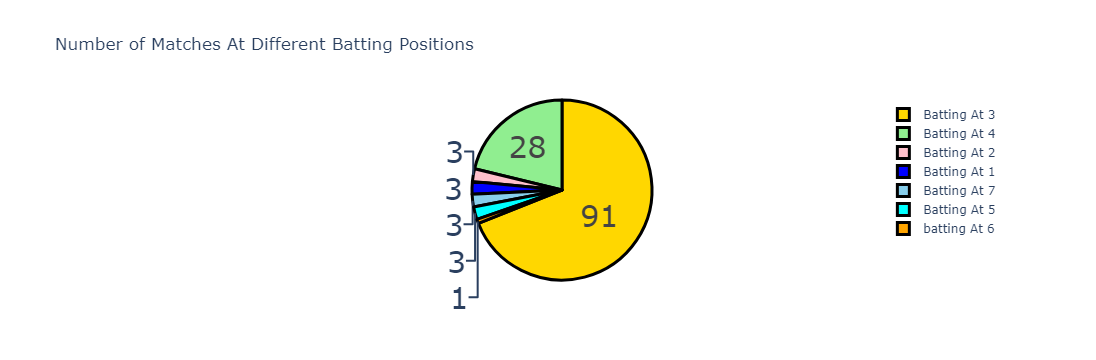

In [30]:
# Batting Positions
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "batting At 6"})

Pos = data["Pos"].value_counts()
label = Pos.index
counts = Pos.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

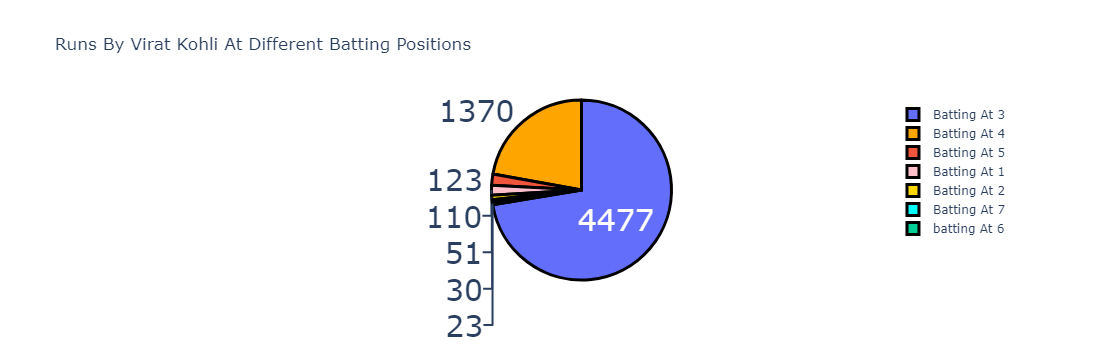

In [31]:
label = data["Pos"]
counts = data["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Virat Kohli At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

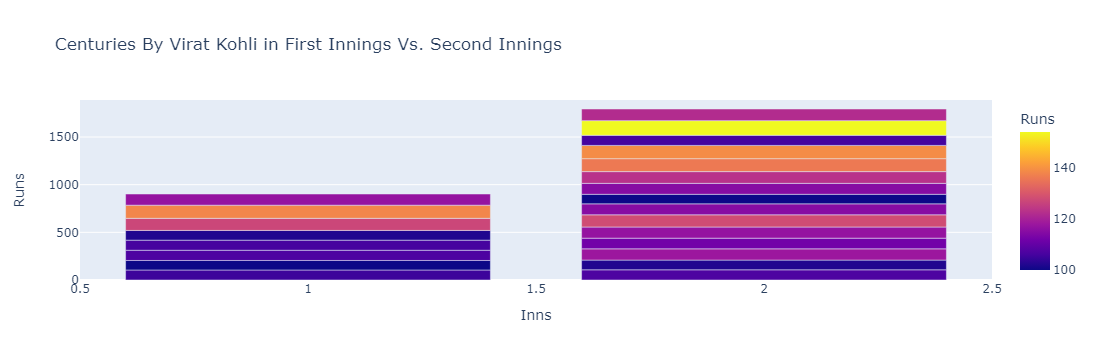

In [32]:
centuries = data.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

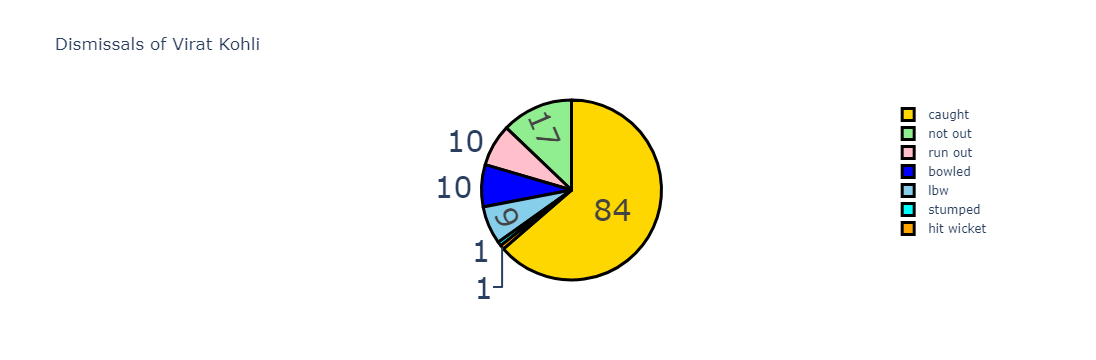

In [33]:
# Dismissals of Virat Kohli
dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

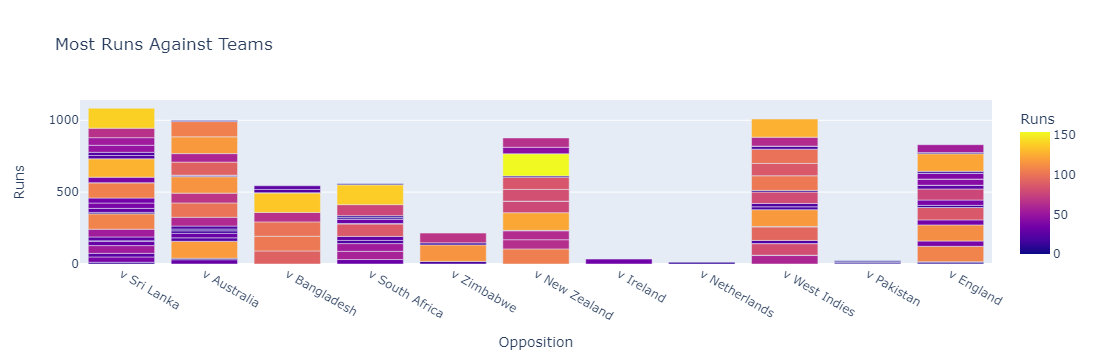

In [34]:
figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()

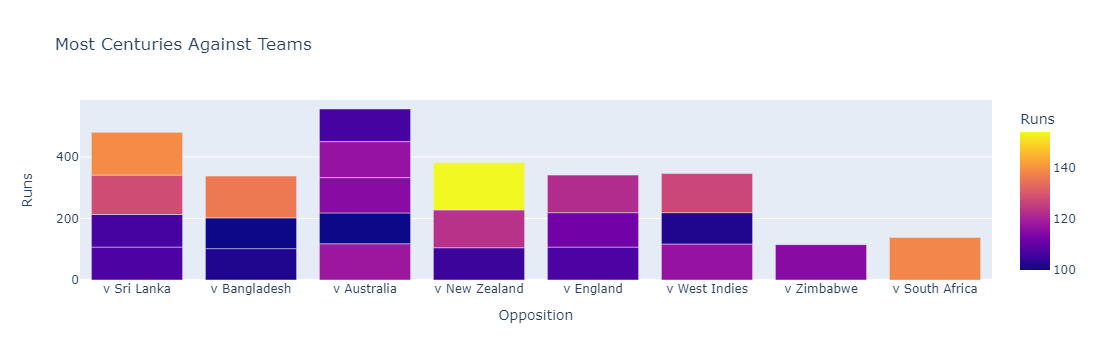

In [35]:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

In [36]:
strike_rate = data.query("SR >= 120")
print(strike_rate)

     Runs  BF  4s  6s      SR           Pos Dismissal  Inns     Opposition  \
8      27  19   4   0  142.10  Batting At 7    bowled     1    v Sri Lanka   
32    100  83   8   2  120.48  Batting At 4   not out     1   v Bangladesh   
56     23  11   3   0  209.09  batting At 6   not out     1  v West Indies   
76     43  34   4   1  126.47  Batting At 3    caught     1      v England   
78    102  83  13   2  122.89  Batting At 3    caught     1  v West Indies   
83    100  52   8   7  192.30  Batting At 3   not out     2    v Australia   
85    115  66  18   1  174.24  Batting At 3   not out     2    v Australia   
93     78  65   7   2  120.00  Batting At 3    caught     2  v New Zealand   
130     8   5   2   0  160.00  Batting At 3    caught     1      v England   

            Ground Start Date  
8           Rajkot  15-Dec-09  
32           Dhaka  19-Feb-11  
56          Indore   8-Dec-11  
76      Birmingham  23-Jun-13  
78   Port of Spain   5-Jul-13  
83          Jaipur  16-Oct-

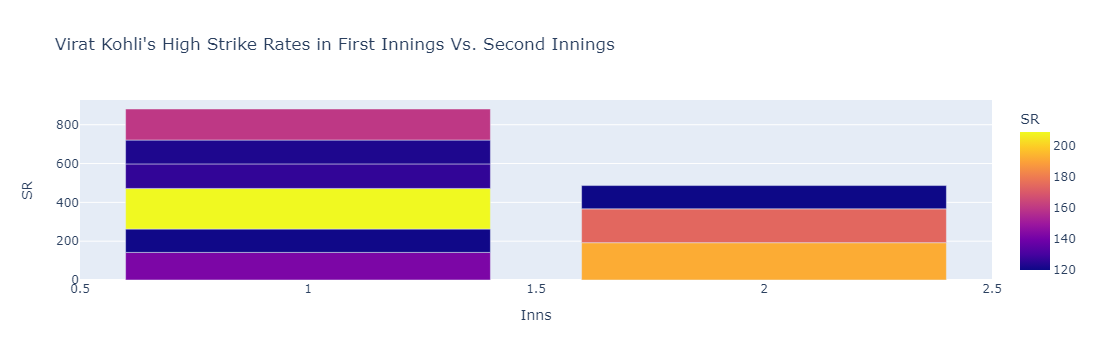

In [37]:
figure = px.bar(strike_rate, x = strike_rate["Inns"], 
                y = strike_rate["SR"], 
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

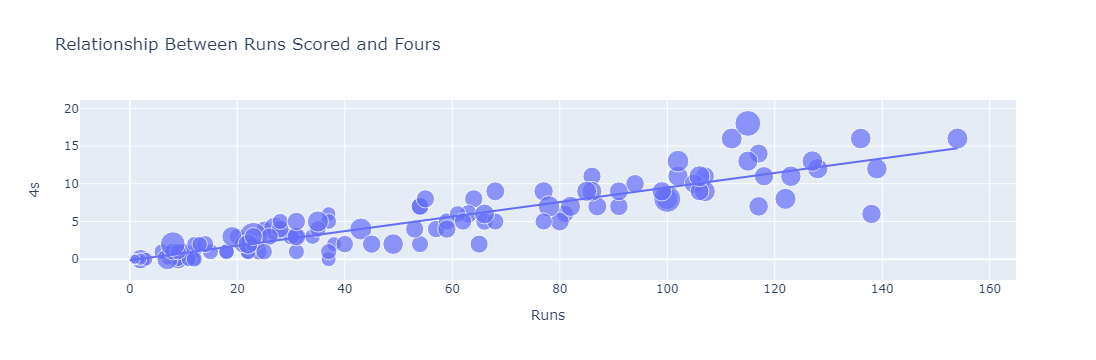

In [38]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="4s", size="SR", trendline="ols", 
                    title="Relationship Between Runs Scored and Fours")
figure.show()

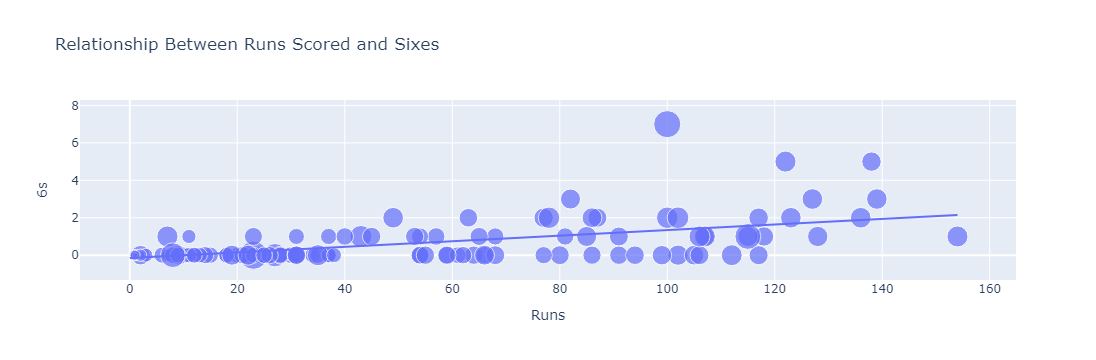

In [39]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="6s", size="SR", trendline="ols", 
                    title= "Relationship Between Runs Scored and Sixes")
figure.show()